<a href="https://colab.research.google.com/github/Richleo/Colab/blob/master/TestShape_20210109_source_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###############################################################
# BASEBALL_범주형_템플릿_20210103.ipynb 에서 하드코딩으로 성공
###############################################################

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy import zeros, newaxis
from sklearn.model_selection import train_test_split, cross_val_score

tf.random.set_seed(777)

#https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
#https://data-newbie.tistory.com/260
#OneHotEncoder(sparse=False, categorical_features=[2, 3, 8])
#이렇게 하면, index가 2, 3, 8인 feature가 categorical임을 의미한다.



#np.array 관련 url : https://iludaslab.tistory.com/44

In [34]:
baseball = np.array([
  [20190402,	'jamsil',	1,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190402,	'jamsil',	3,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190402,	'jamsil',	5,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190402,	'jamsil',	7,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190403,	'jamsil',	2,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190403,	'jamsil',	4,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190403,	'jamsil',	6,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	4]
, [20190403,	'jamsil',	8,	'1',	'kt',		'dusan',	'kt_jugwon_1995-05-31',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	2,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190404,	'jamsil',	4,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	6,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190404,	'jamsil',	8,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190405,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190405,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190406,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190406,	'jamsil',	3,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190406,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190406,	'jamsil',	7,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190406,	'jamsil',	9,	'1',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	2,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	5,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
, [20190407,	'jamsil',	6,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190407,	'jamsil',	8,	'1',	'nc',		'dusan',	'nc_baejaehwan_1995-02-24',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190412,	'jamsil',	3,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190412,	'jamsil',	5,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190412,	'jamsil',	7,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	0]
, [20190412,	'jamsil',	9,	'0',	'lg',		'dusan',	'lg_jeongchanheon_1990-01-26',		'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190413,	'jamsil',	1,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190413,	'jamsil',	2,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190413,	'jamsil',	4,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190413,	'jamsil',	6,	'0',	'lg',		'dusan',	'lg_jinhaesu_1986-06-26',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190413,	'jamsil',	8,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	0]
, [20190414,	'jamsil',	2,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190414,	'jamsil',	4,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	2]
, [20190414,	'jamsil',	5,	'0',	'lg',		'dusan',	'lg_choedonghwan_1989-09-19',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
#, [20190414,	'jamsil',	6,	'0',	'lg',		'dusan',	'lg_gimdaehyeon_1997-03-08',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
#, [20190414,	'jamsil',	8,	'0',	'lg',		'dusan',	'lg_sinjeongrak_1987-05-13',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
#, [20190416,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
, [20190416,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	2]
, [20190416,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
, [20190416,	'jamsil',	7,	'1',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
#, [20190417,	'jamsil',	1,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
#, [20190417,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
#, [20190417,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
#, [20190417,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_bakminho_1992-02-25',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
#, [20190417,	'jamsil',	8,	'1',	'sk',		'dusan',	'sk_bakjeongbae_1982-04-01',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
#, [20190418,	'jamsil',	2,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	0]
#, [20190418,	'jamsil',	4,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
#, [20190418,	'jamsil',	6,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
#, [20190418,	'jamsil',	8,	'1',	'sk',		'dusan',	'sk_jeongyeongil_1988-11-16',		'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	0]
#, [20190426,	'jamsil',	2,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
#, [20190426,	'jamsil',	4,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
#, [20190426,	'jamsil',	5,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
#, [20190426,	'jamsil',	6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
#, [20190426,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_gimhyeonsu_2000-07-10',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	0]
#, [20190427,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_ohyeontaek_1985-07-17',		'dusan_heogyeongmin_1990-08-26',	2 ,	'10',	'0',	2]
#, [20190428,	'jamsil',	1,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
#, [20190428,	'jamsil',	3,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
#, [20190428,	'jamsil',	4,	'1',	'rotde',	'dusan',	'rotde_bakgeunhong_1985-08-22',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
#, [20190428,	'jamsil',	6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',	'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
#, [20190428,	'jamsil',	8,	'1',	'rotde',	'dusan',	'rotde_guseungmin_1990-06-12',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
                  ]
                # , dtype='datetime64, string_, int64, string_, string_, string_, int64, string_')  
                # , dtype=[      ('DATE',            'int64')
                #            ,   ('VENUE_ENG',       'string_')
                #            ,   ('INNING',          'int64')
                #            ,   ('INNING_FG',       'string_')
                #            ,   ('PITCHER_TEAM_ENG','string_')
                #            ,   ('BATTER_TEAM_ENG', 'string_')
                #            ,   ('PITCHER_ID',      'string_')
                #            ,   ('BATTER_ID',       'string_')
                #            ,   ('BATTER_ORDER',    'int64')
                #            ,   ('BATTER_POSITION', 'string_')
                #            ,   ('BASE_STATUS',     'string_')
                #            ,   ('RESULT_NUMBER',   'int64')
                #            
                #            ])
                , dtype=object)
                #, dtype= {'names'   :['DATE',   'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG',  'PITCHER_ID',   'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION',  'BASE_STATUS', 'RESULT_NUMBER']
                #        , 'formats' :[ 'object','object',   'object',   'object', 'object',          'object',          'object',      'object',  'object',      'object',          'object',     'object']
                #        }
                #    )

#x_cols = ['DATE', 'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG','PITCHER_ID', 'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION', 'BASE_STATUS']
tempSplitedBaseball = np.hsplit(baseball, [11])

#print(tempSplitedBaseball[0])
#y_baseball = baseball['RESULT_NUMBER']

ct = ColumnTransformer([("venue_eng, inning_fg, pitcher_team_eng, batter_team_eng, pitcher_id, batter_id, batter_position, base_status", OneHotEncoder(), [1, 3, 4, 5, 6, 7, 9, 10])], remainder = 'passthrough')
x_baseball = ct.fit_transform(tempSplitedBaseball[0])
y_baseball = tempSplitedBaseball[1]

#print(x_baseball)
print(x_baseball.shape)
print(x_baseball.ndim)
print(x_baseball.size)
print(x_baseball[x_baseball.ndim - 1].size)

(38, 36)
2
1368
36


In [35]:
##########모델 생성
x_train, x_test, y_train, y_test = train_test_split(x_baseball,y_baseball, test_size = 0.2)

##테스트 데이터가 36행 이상이면 오류가 발생
x_train_array_reshape = x_train[:, np.newaxis, :]
x_test_array_reshape  = x_test[:, np.newaxis, :]

model_size_columns = x_train[x_train.ndim - 1].size

# Make Model
layer_input  = tf.keras.Input(shape=(1, model_size_columns), name='input')
layer_rnn    = tf.keras.layers.SimpleRNN(100, name='RNN')(layer_input)
layer_output = tf.keras.layers.Dense(1, name='output')(layer_rnn)

model = tf.keras.Model(layer_input, layer_output)
model.summary()

# Complier
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])
model._name = 'many_to_one'


#model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1, 36)]           0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 100)               13700     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 13,801
Trainable params: 13,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
###################################################################################################
## test 데이터를 맞추려면, 적어도 epochs=10000 은 해야 함. batch_size를 1로 했을 때
###################################################################################################

X = np.asarray(x_train_array_reshape).astype(np.float32) 
Y = np.asarray(y_train).astype(np.float32)

x_test_for_compare = np.asarray(x_test_array_reshape).astype(np.float32) 

##########모델 학습
hist = model.fit(X, Y, epochs=1000, batch_size=1) 


history_dict = hist.history

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.3889
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9637 - accuracy: 0.2778
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.5000
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9693 - accuracy: 0.2222
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9445 - accuracy: 0.2778 
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9872 - accuracy: 0.6667
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9351 - accuracy: 0.2778
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.0127 - accuracy: 0.2778 
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9336 - accuracy: 0.3333
Epoch 10/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.66

[[0]
 [1]
 [0]
 [1]
 [1]]
[[0.51872087]
 [0.51872087]
 [0.51872087]
 [0.51872087]
 [0.51872087]]


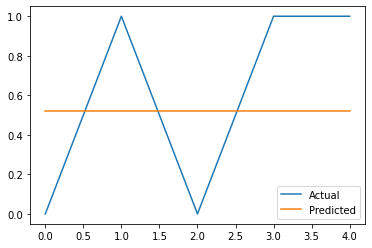

In [48]:
##########모델 예측

y_pred = model.predict(x_test_for_compare)


##########모델 검증 (정답과 예측치 비교)

print(y_test)
print(y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

%matplotlib inline


plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["Actual", "Predicted"])
plt.show()